In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import subprocess
import cv2
%matplotlib inline

In [4]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

In [4]:
output_name = '20170720'
folder_name = '20170711-6'

# vmem

In [40]:
vmem1 = RawCam(path='/mnt/recordings/SimulationResults/20170711-6', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
#vmem2 = RawCam(path='/mnt/recordings/SimulationResults/20170713-2/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
#vmem3 = RawCam(path='/mnt/recordings/SimulationResults/20170713-3', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem4 = RawCam(path='/mnt/recordings/SimulationResults/20170714-4/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [41]:
#vmem1.data = np.vstack((vmem1.data, vmem2.data[1:, :, :]))
#vmem1.data = np.vstack((vmem1.data, vmem3.data[1:, :, :]))
vmem1.data = np.vstack((vmem1.data, vmem4.data[1:, :, :]))

In [42]:
vmem1.data.shape

(1001, 200, 200)

In [43]:
vmem_temp = VmemMap(vmem1)
vmem1.cmap = vmem_temp.cmap

# colorbar

## vmem

In [44]:
plt.imshow(vmem1.data[0, :, :], vmin=np.min(vmem1.data), vmax=np.max(vmem1.data), cmap=vmem1.cmap)
plt.colorbar()
os.makedirs('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/20170711-6')
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/20170711-6/vmem.png', dpi=1000)
plt.close()

## Ina

In [6]:
current = np.zeros((1001, 200, 200))
current_name = 'xina.npy'
for i in range(400):
    num = '{0:04d}'.format(i)
    current[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, current_name))
for i in range(200):
    num = '{0:04d}'.format(i)
    current[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, current_name))
for i in range(400):
    num = '{0:04d}'.format(i)
    current[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, current_name))

In [7]:
plt.imshow(current[0, :, :], vmin=np.min(current), vmax=np.max(current), cmap='jet')
plt.colorbar()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/ina.png', dpi=1000)
plt.close()

# activation params in Ina

In [12]:
m = np.zeros(5400)
h = np.zeros(5400)
j = np.zeros(5400)
for i in range(5400):
    num = '{0:05d}'.format(i+1)
    m[i] = np.load('/mnt/recordings/SimulationResults/20170624-1/%s/m.npy'%num)
    h[i] = np.load('/mnt/recordings/SimulationResults/20170624-1/%s/h.npy'%num)
    j[i] = np.load('/mnt/recordings/SimulationResults/20170624-1/%s/j.npy'%num)

In [27]:
plt.plot(m)
plt.xlim([5220, 5400])
plt.ylim([0, 1])
plt.xticks([5220, 5240, 5260, 5280, 5300, 5320, 5340, 5360, 5380, 5400], [0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.xlabel('Time (ms)', size=15)
plt.ylabel('Open Probability', size=15)
plt.title('Activation Parameter: m', size=20)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/m.png', dpi=500)
plt.close()

In [28]:
plt.plot(h)
plt.xlim([5220, 5400])
plt.ylim([0, 1])
plt.xticks([5220, 5240, 5260, 5280, 5300, 5320, 5340, 5360, 5380, 5400], [0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.xlabel('Time (ms)', size=15)
plt.ylabel('Open Probability', size=15)
plt.title('Inactivation Parameter: h', size=20)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/h.png', dpi=500)
plt.close()

In [29]:
plt.plot(j)
plt.xlim([5220, 5400])
plt.ylim([0, 1])
plt.xticks([5220, 5240, 5260, 5280, 5300, 5320, 5340, 5360, 5380, 5400], [0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.xlabel('Time (ms)', size=15)
plt.ylabel('Open Probability', size=15)
plt.title('Inactivation Parameter: j', size=20)
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170720/j.png', dpi=500)
plt.close()

# hj map & Ina map & pvmap

In [5]:
hj_array = np.zeros((1001, 200, 200))
m_array = np.zeros((1001, 200, 200))
Ina = np.zeros((1001, 200, 200))

In [6]:
for i in range(400):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i, :, :] = a*b
    m_array[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'm.npy'))
    Ina[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'xina.npy'))
for i in range(200):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i+400, :, :] = a*b
    m_array[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'm.npy'))
    Ina[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'xina.npy'))
for i in range(400):
    num = '{0:04d}'.format(i)
    a = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'h.npy'))
    b = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'j.npy'))
    hj_array[i+600, :, :] = a*b
    m_array[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'm.npy'))
    Ina[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'xina.npy'))

In [5]:
vmem1 = RawCam(path='/mnt/recordings/SimulationResults/20170711-4', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem2 = RawCam(path='/mnt/recordings/SimulationResults/20170713-2/', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)
vmem3 = RawCam(path='/mnt/recordings/SimulationResults/20170714-2', cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

vmem1.data = np.vstack((vmem1.data, vmem2.data[1:, :, :]))
vmem1.data = np.vstack((vmem1.data, vmem3.data[1:, :, :]))
vmem_temp = VmemMap(vmem1)
vmem1.cmap = vmem_temp.cmap

pmap = PhaseMap(vmem1, shrink=1)
pvmap = PhaseVarianceMap(pmap, size=3)

In [21]:
plt.imshow(pvmap.data[100, :, :], vmin=np.min(pvmap.data), vmax=np.max(pvmap.data), cmap=pvmap.cmap)
plt.colorbar()
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/pvmap.png', dpi=1000)
plt.close()

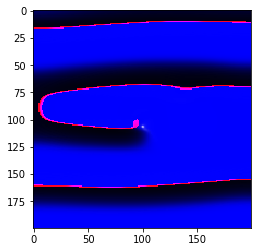

In [24]:
#100ms時
im_out = np.zeros([200, 200, 3], dtype=np.uint8)
im_out[:, :, 0] = pvmap.data[100, :, :]*255 + (1-pvmap.data[100, :, :]) * (Ina[100, :, :]<-1)*255
#im_out[:, :, 0] = pvmap.data[100, :, :]*255 + (1-pvmap.data[100, :, :]) * (m_array[100, :, :]>0.90)*255
im_out[:, :, 2] = pvmap.data[100, :, :]*255 + (1-pvmap.data[100, :, :]) * (1-hj_array[100, :, :])*255
im_out[:, :, 1] = pvmap.data[100, :, :]*255
plt.imshow(im_out)
plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/sample2.png', im_out)

In [60]:
if not os.path.exists('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/integrate'):
    os.makedirs('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/integrate')

for i in range(900):
    num = num = '{0:06d}'.format(i)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    im_out[:, :, 0] = pvmap.data[i, :, :]*255 + (1-pvmap.data[i, :, :]) * (Ina[i, :, :]<-1)*255
    im_out[:, :, 1] = pvmap.data[i, :, :]*255
    im_out[:, :, 2] = pvmap.data[i, :, :]*255 + (1-pvmap.data[i, :, :]) * (1-hj_array[i, :, :])*255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/integrate/%s.png' % num, im_out)

In [26]:
subprocess.call('ffmpeg -r 15 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/integrate/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170721/integrate/movie.mp4"', shell=True)

0

In [9]:
if not os.path.exists('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170722/threshold'):
    os.makedirs('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170722/threshold')

for i in range(900):
    num = '{0:06d}'.format(i)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    threshold = np.ones((200, 200)) * (hj_array[i, :, :] > 0.2) * (hj_array[i, :, :] < 0.4)
    im_out[:, :, 0] = (Ina[i, :, :]<-1)*255
    im_out[:, :, 1] = threshold*(1-hj_array[i, :, :])*255
    im_out[:, :, 2] = (1-hj_array[i, :, :])*255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170722/threshold/%s.png' % num, im_out)
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170722/threshold/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170722/threshold/movie.mp4"', shell=True)

0

In [13]:
if not os.path.exists('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold'):
    os.makedirs('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold')

for i in range(900):
    num = '{0:06d}'.format(i)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    if i != 0:
        slope = (hj_array[i, :, :]-hj_array[i-1, :, :]).astype(np.bool)
    else:
        slope = 1
    threshold = np.ones((200, 200)) * (hj_array[i, :, :] > 0.2) * (hj_array[i, :, :] < 0.4) * slope
    im_out[:, :, 0] = (Ina[i, :, :]<-1)*255
    im_out[:, :, 1] = threshold*(1-hj_array[i, :, :])*255
    im_out[:, :, 2] = (1-hj_array[i, :, :])*255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/%s.png' % num, im_out)
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/movie.mp4"', shell=True)

0

# zoom up

In [87]:
numbers = [370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385]
for number in numbers:
    num = '{0:06d}'.format(number)
    im_out = np.zeros([200, 200, 3], dtype=np.uint8)
    threshold = np.ones((200, 200)) * (hj_array[number, :, :] > 0.2) * (hj_array[number, :, :] < 0.4)
    im_out[:, :, 0] = (Ina[number, :, :]<-1)*255
    im_out[:, :, 1] = threshold*(1-hj_array[number, :, :])*255
    im_out[:, :, 2] = (1-hj_array[number, :, :])*255
    plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/%s.png' % num, im_out[55:90, 145:180, :])

In [88]:
a = np.ones((200, 200))
a[55:90, 145:180] = 0

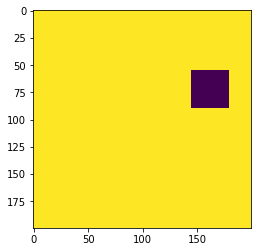

In [90]:
plt.imshow(a)
plt.imsave('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20170723/threshold/ROI.png', a)

In [4]:
h = np.zeros((1001, 200, 200))
j = np.zeros((1001, 200, 200))
for i in range(400):
    num = '{0:04d}'.format(i)
    h[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'h.npy'))
    j[i, :, :] = np.load('/mnt/recordings/SimulationResults/20170711-4/cell_%s/%s' % (num, 'j.npy'))
for i in range(200):
    num = '{0:04d}'.format(i)
    h[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'h.npy'))
    j[i+400, :, :] = np.load('/mnt/recordings/SimulationResults/20170713-2/cell_%s/%s' % (num, 'j.npy'))
for i in range(400):
    num = '{0:04d}'.format(i)
    h[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'h.npy'))
    j[i+600, :, :] = np.load('/mnt/recordings/SimulationResults/20170714-2/cell_%s/%s' % (num, 'j.npy'))

(300, 400)

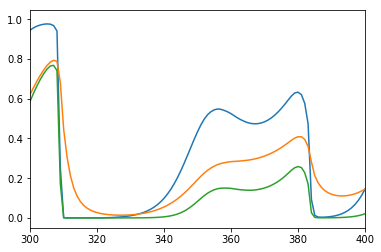

In [10]:
plt.plot(h[:, 75, 160])
plt.plot(j[:, 75, 160])
plt.plot(h[:, 75, 160]*j[:, 75, 160])
plt.xlim([300, 400])